In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(color_codes=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
dataset = pd.read_csv('drive/My Drive/Colab Notebooks/new/My DataSet.csv')

In [ ]:
dataset


,Sno.,Date_confirmation,Confirmed Cases,Country,City,Age,Gender,Symptoms
0,1,06-05-2022,1,England,London,NaN,NaN,rash
1,2,12-05-2022,1,England,London,NaN,NaN,rash
2,3,13-05-2022,1,England,London,NaN,NaN,vesicular rash
3,4,15-05-2022,4,England,London,NaN,male,vesicular rash
4,5,17-05-2022,3,England,London,NaN,male,vesicular rash
...,...,...,...,...,...,...,...,...
95,96,18-08-2022,195,Spain,Madrid,NaN,male,NaN
96,97,19-08-2022,125,Spain,Madrid,NaN,male,NaN
97,98,20-08-2022,182,Spain,Madrid,NaN,male,NaN
98,99,21-08-2022,290,Spain,Madrid,NaN,male,NaN


Vizualizaton


In [ ]:
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country", 
                  title=col, hover_data=[col], height=800,width=1200, color_continuous_scale="peach")
    fig.show()

In [ ]:
plot_map(dataset, 'Confirmed Cases')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



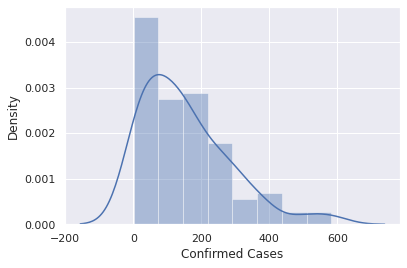

In [ ]:
sns.distplot(dataset['Confirmed Cases'])

In [ ]:
dataset.drop(['Country'],inplace = True,axis =1)

In [ ]:
dataset.drop(['City'],inplace = True,axis =1)

In [ ]:
dataset.drop(['Age'],inplace = True,axis =1)

In [ ]:
dataset.drop(['Sno.'],inplace = True,axis =1)

In [ ]:
dataset


,Date_confirmation,Confirmed Cases,Gender,Symptoms
0,06-05-2022,1,NaN,rash
1,12-05-2022,1,NaN,rash
2,13-05-2022,1,NaN,vesicular rash
3,15-05-2022,4,male,vesicular rash
4,17-05-2022,3,male,vesicular rash
...,...,...,...,...
95,18-08-2022,195,male,NaN
96,19-08-2022,125,male,NaN
97,20-08-2022,182,male,NaN
98,21-08-2022,290,male,NaN


In [ ]:
dataset = dataset.groupby('Date_confirmation').sum().reset_index()

In [ ]:
dataset['Date_confirmation'] = pd.to_datetime(dataset['Date_confirmation'], errors='coerce')
dataset['month'] = dataset['Date_confirmation'].dt.month

In [ ]:
dataset['day'] = dataset['Date_confirmation'].dt.day

In [ ]:
dataset

,Date_confirmation,Confirmed Cases,month,day
0,2022-01-06,83,1,6
1,2022-01-07,99,1,7
2,2022-01-08,148,1,8
3,2022-02-06,125,2,6
4,2022-02-07,153,2,7
...,...,...,...,...
95,2022-05-30,123,5,30
96,2022-06-30,48,6,30
97,2022-07-30,85,7,30
98,2022-05-31,66,5,31


In [ ]:
dataset.drop(['Date_confirmation'],inplace = True , axis = 1)


In [ ]:
dataset 

,Confirmed Cases,month,day
0,83,1,6
1,99,1,7
2,148,1,8
3,125,2,6
4,153,2,7
...,...,...,...
95,123,5,30
96,48,6,30
97,85,7,30
98,66,5,31


In [ ]:
X = dataset.drop('Confirmed Cases',axis = 1).values
Y = dataset['Confirmed Cases'].values

In [ ]:
X.shape

(100, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test = train_test_split(X,Y,test_size = 1/3,random_state = 0)

In [ ]:
X_train.shape

(66, 2)

In [ ]:
X_test.shape

(34, 2)

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(random_state =0)
RandomForest.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred3 = RandomForest.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

0.2868298862161359

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor(random_state=0)
DecisionTree.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred2 = DecisionTree.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.10634978759288949

Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


-0.08110700664911064